# Exploring Crime Occurrences and Neighbourhood Venues in Toronto #

### Introduction 

Do the types of venues in a neighbourhood contribute to their crime rate?

This is a search for correlation between crime occurrences and venue types in neighbourhoods of Toronto.  

I will use the [Toronto Police Service Public Safety Data Portal site](https://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-boundary-file-) for crime data by neighbourhood and the [Foursquare API](https://developer.foursquare.com/) for venue data.

This exploration will group neighbourhoods by venues and examine their crime occurrences for any correlations between venues and crime.

## 1. Get and Process the Toronto Police Service Data on Crime ##

### Import Libraries ###

In [6]:
# import dependencies
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes
import folium

# import k-means from clustering stage
!conda install scikit-learn --yes
from sklearn.cluster import KMeans

!conda install -c conda-forge geocoder --yes
import geocoder
!conda install -c conda-forge geopy --yes
import geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

print("Libraries imported")

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /Users/robertmcmillan/anaconda3/envs/ibmdatascience

  added / updated specs:
    - scikit-learn


The following packages will be UPDATED:

  openssl            conda-forge::openssl-1.1.1b-h01d97ff_2 --> pkgs/main::openssl-1.1.1c-h1de35cc_1


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /Users/robertmcmillan/anaconda3/envs/ibmdatascience

  added / updated specs:
    - geocoder


The following packages will be SUPERSEDED by a higher-priority channel:

  openssl              pkgs/main::openssl-1.1.1c-h1de35cc_1 --> conda-forge::openssl-1.1.1b-h01d97ff_2


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /Users/robertmcmillan/anaconda3

### Get and Process the Toronto Police Service Data on Crime ###
##### This data contains [information licensed](https://www.arcgis.com/home/item.html?id=af500b5abb7240399853b35a2362d0c0) under the Open Government Licence – Ontario. #####

In [7]:
# Get the Toronto Police Service Data on crime
crime_df = pd.read_csv('Downloads/Neighbourhood_Crime_Rates_Boundary_File_.csv')
crime_df.head()

,OBJECTID,Neighbourhood_Crime_Rates_Neigh,Neighbourhood_Crime_Rates_Hood_,Hood_ID,Neighbourhood,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_AVG,Assault_CHG,Assault_Rate_2018,Auto_Theft_2014,Auto_Theft_2015,Auto_Theft_2016,Auto_Theft_2017,Auto_Theft_2018,AutoTheft_AVG,AutoTheft_CHG,AutoTheft_Rate_2018,BreakandEnter_2014,BreakandEnter_2015,BreakandEnter_2016,BreakandEnter_2017,BreakandEnter_2018,BreakandEnter_AVG,BreakandEnter_CHG,BreakandEnter_Rate_2018,Robbery_2014,Robbery_2015,Robbery_2016,Robbery_2017,Robbery_2018,Robbery_AVG,Robbery_CHG,Robbery_Rate_2018,Theft_Over_2014,Theft_Over_2015,Theft_Over_2016,Theft_Over_2017,Theft_Over_2018,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2018,Homicide_2014,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_AVG,Homicide_CHG,Homicide_Rate_2018,Population,Shape__Area,Shape__Length
0,1,Yonge-St.Clair,97,97,Yonge-St.Clair,58,38,51,46,61,50.8,33%,1912.8,28,32,22,46,69,39.4,50%,2163.7,29,16,28,32,23,25.6,-28%,721.2,12,25.0,14,21,19,18.2,-10%,595.8,3,6,4.0,6,3.0,4.4,-50%,94.1,0,0,0,0,0,NaN,NaN,0.0,3189,1.161315e+06,5873.270507
1,2,York University Heights,27,27,York University Heights,78,101,111,120,138,109.6,15%,375.4,16,13,8,19,23,15.8,21%,62.6,43,59,61,34,52,49.8,53%,141.4,28,22.0,23,31,15,23.8,-52%,40.8,4,4,3.0,6,2.0,3.8,-67%,5.4,1,0,2,0,1,1.3,NaN,2.7,36764,1.324666e+07,18504.777616
2,3,Lansing-Westgate,38,38,Lansing-Westgate,216,203,223,226,197,213.0,-13%,1923.5,21,25,23,36,22,25.4,-39%,214.8,43,78,72,73,52,63.6,-29%,507.7,81,53.0,49,43,41,53.4,-5%,400.3,8,4,7.0,2,6.0,5.4,200%,58.6,0,0,0,0,0,NaN,NaN,0.0,10242,5.346186e+06,11112.109419
3,4,Yorkdale-Glen Park,31,31,Yorkdale-Glen Park,121,141,136,124,127,129.8,2%,696.5,47,27,25,30,28,31.4,-7%,153.6,83,50,65,31,56,57.0,81%,307.1,42,32.0,22,18,35,29.8,94%,192.0,8,6,8.0,10,13.0,9.0,30%,71.3,1,1,1,1,2,1.2,100%,11.0,18233,6.038326e+06,10079.426837
4,5,Stonegate-Queensway,16,16,Stonegate-Queensway,109,140,124,112,128,122.6,14%,576.4,20,17,22,14,41,22.8,193%,184.6,48,37,34,37,41,39.4,11%,184.6,33,22.0,41,35,36,33.4,3%,162.1,10,3,4.0,5,4.0,5.2,-20%,18.0,1,0,0,0,0,1.0,NaN,0.0,22207,7.946202e+06,11853.189803


In [8]:
# examine the size of the data
crime_df.shape

(140, 56)

In [9]:
# examine the columns
crime_df.columns.values

array(['OBJECTID', 'Neighbourhood_Crime_Rates_Neigh',
       'Neighbourhood_Crime_Rates_Hood_', 'Hood_ID', 'Neighbourhood',
       'Assault_2014', 'Assault_2015', 'Assault_2016', 'Assault_2017',
       'Assault_2018', 'Assault_AVG', 'Assault_CHG', 'Assault_Rate_2018',
       'Auto_Theft_2014', 'Auto_Theft_2015', 'Auto_Theft_2016',
       'Auto_Theft_2017', 'Auto_Theft_2018', 'AutoTheft_AVG',
       'AutoTheft_CHG', 'AutoTheft_Rate_2018', 'BreakandEnter_2014',
       'BreakandEnter_2015', 'BreakandEnter_2016', 'BreakandEnter_2017',
       'BreakandEnter_2018', 'BreakandEnter_AVG', 'BreakandEnter_CHG',
       'BreakandEnter_Rate_2018', 'Robbery_2014', 'Robbery_2015',
       'Robbery_2016', 'Robbery_2017', 'Robbery_2018', 'Robbery_AVG',
       'Robbery_CHG', 'Robbery_Rate_2018', 'Theft_Over_2014',
       'Theft_Over_2015', 'Theft_Over_2016', 'Theft_Over_2017',
       'Theft_Over_2018', 'TheftOver_AVG', 'TheftOver_CHG',
       'TheftOver_Rate_2018', 'Homicide_2014', 'Homicide_2015',
      

In [10]:
# Choose the columns of interest
crime_df = crime_df[['Neighbourhood', 'Assault_2018', 'Auto_Theft_2018', 'BreakandEnter_2018', 'Robbery_2018',\
                 'Theft_Over_2018', 'Homicide_2018']]

crime_df.head(10)

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018
0,Yonge-St.Clair,61,69,23,19,3.0,0
1,York University Heights,138,23,52,15,2.0,1
2,Lansing-Westgate,197,22,52,41,6.0,0
3,Yorkdale-Glen Park,127,28,56,35,13.0,2
4,Stonegate-Queensway,128,41,41,36,4.0,0
5,Tam O'Shanter-Sullivan,56,46,18,11,2.0,1
6,The Beaches,457,22,236,78,30.0,0
7,Thistletown-Beaumond Heights,30,25,25,8,7.0,2
8,Thorncliffe Park,135,114,60,42,15.0,0
9,Danforth East York,227,156,115,33,54.0,0


In [12]:
# check for null entries
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
Neighbourhood         140 non-null object
Assault_2018          140 non-null int64
Auto_Theft_2018       140 non-null int64
BreakandEnter_2018    140 non-null int64
Robbery_2018          140 non-null int64
Theft_Over_2018       139 non-null float64
Homicide_2018         140 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 7.7+ KB


In [84]:
# we have one null entry in the Theft_Over_2018 column, so drop the row that contains it
tor_crime_df = crime_df.dropna()

In [85]:
# examine the new size of the data; it should have 139 rows
print("The number of rows, columns in the data: {}, {}".format(tor_crime_df.shape[0], tor_crime_df.shape[1]))

The number of rows, columns in the data: 139, 7


In [86]:
# Change the Theft_Over_2018 column to an int and check the new datatypes

tor_crime_df = tor_crime_df.astype({"Theft_Over_2018": 'int64'})
tor_crime_df.dtypes

Neighbourhood         object
Assault_2018           int64
Auto_Theft_2018        int64
BreakandEnter_2018     int64
Robbery_2018           int64
Theft_Over_2018        int64
Homicide_2018          int64
dtype: object

In [87]:
# view the new dataframe
tor_crime_df.head(10)

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018
0,Yonge-St.Clair,61,69,23,19,3,0
1,York University Heights,138,23,52,15,2,1
2,Lansing-Westgate,197,22,52,41,6,0
3,Yorkdale-Glen Park,127,28,56,35,13,2
4,Stonegate-Queensway,128,41,41,36,4,0
5,Tam O'Shanter-Sullivan,56,46,18,11,2,1
6,The Beaches,457,22,236,78,30,0
7,Thistletown-Beaumond Heights,30,25,25,8,7,2
8,Thorncliffe Park,135,114,60,42,15,0
9,Danforth East York,227,156,115,33,54,0


In [88]:
# Sum the number of crime counts and add it to the dataframe
tor_crime_df['Crime_Occurrence'] = tor_crime_df.sum(axis=1)
tor_crime_df.head(10)

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018,Crime_Occurrence
0,Yonge-St.Clair,61,69,23,19,3,0,175
1,York University Heights,138,23,52,15,2,1,231
2,Lansing-Westgate,197,22,52,41,6,0,318
3,Yorkdale-Glen Park,127,28,56,35,13,2,261
4,Stonegate-Queensway,128,41,41,36,4,0,250
5,Tam O'Shanter-Sullivan,56,46,18,11,2,1,134
6,The Beaches,457,22,236,78,30,0,823
7,Thistletown-Beaumond Heights,30,25,25,8,7,2,97
8,Thorncliffe Park,135,114,60,42,15,0,366
9,Danforth East York,227,156,115,33,54,0,585


### Get coordinates for Toronto neighbourhoods and add them to the data ###

In [89]:
geolocator = Nominatim(user_agent="tor_crime_and_venues")

In [90]:
# create a list of the neighbourhoods
neighbourhoods = tor_crime_df['Neighbourhood']

In [91]:
# view the neighbourhoods 
neighbourhoods

0                           Yonge-St.Clair
1                  York University Heights
2                         Lansing-Westgate
3                       Yorkdale-Glen Park
4                      Stonegate-Queensway
5                   Tam O'Shanter-Sullivan
6                              The Beaches
7             Thistletown-Beaumond Heights
8                         Thorncliffe Park
9                       Danforth East York
10                      Humewood-Cedarvale
11              Islington-City Centre West
12                                Danforth
13                                  Rustic
14                     Scarborough Village
15                          South Parkdale
16                         South Riverdale
17                    St.Andrew-Windfields
18                           Taylor-Massey
19                           Humber Summit
20                              Humbermede
21                  Centennial Scarborough
22                   Church-Yonge Corridor
23         

In [92]:
# create lists to hold neighbourhood latitudes and longitudes

lat_list = []
long_list = []

# loop through the neighbourhoods and find the coordinates with geolocator
for neighbourhood in neighbourhoods:
    try:
        location = geolocator.geocode(neighbourhood + ", Toronto, Ontario")
        lat_list.append(location.latitude)
        long_list.append(location.longitude)
    except:
        # add NaN placeholder if no coordinates returned, to help future processing
        lat_list.append(np.nan)
        long_list.append(np.nan)
    

In [93]:
# view coordinates
for i, j in zip(lat_list, long_list):
    print(i, j)

43.6882104 -79.3940036
43.7587808 -79.5194336
43.7589503 -79.4225555
43.7064433 -79.4526856
43.62195 -79.5234993
nan nan
43.6710244 -79.296712
nan nan
43.704553 -79.3454074
43.6863598 -79.3003158
nan nan
43.6487953 -79.5490002
43.6863598 -79.3003158
43.717797 -79.4802732
43.7437422 -79.2116324
43.6404954 -79.4368965
43.6654704 -79.3525936
nan nan
43.6976474 -79.3011926
43.7600778 -79.5717598
nan nan
43.7874914 -79.1507681
43.66269255 -79.3868748005113
nan nan
43.7219387 -79.2362324
43.7184315 -79.333204
43.677954 -79.4430828
43.7359904 -79.2765146
43.6654775 -79.470352
43.6839242 -79.3569642
nan nan
43.6654704 -79.3525936
43.64355605 -79.5653288915105
43.6935586 -79.4139023
43.7572532 -79.5176975
nan nan
43.7548985 -79.1977755
43.64756465 -79.4138809026667
43.732658 -79.3111892
nan nan
43.7689144 -79.1872905
nan nan
nan nan
43.724878 -79.2539688
nan nan
43.7981268 -79.3829726
43.7431757 -79.4517261
43.6901578 -79.4749985
43.7070599 -79.3116303
43.6913391 -79.3278212
43.6781015 -79.4094

In [94]:
# check how many neighbourhoods we could not find coordinates for
print("Could not find coordinates for {} neighbourhoods.".format(lat_list.count(np.nan)))

Could not find coordinates for 34 neighbourhoods.


In [95]:
# add the coordinates to the dataframe
tor_crime_df["Latitude"] = lat_list
tor_crime_df["Longitude"] = long_list

# view the dataframe
tor_crime_df.head(10)

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018,Crime_Occurrence,Latitude,Longitude
0,Yonge-St.Clair,61,69,23,19,3,0,175,43.688210,-79.394004
1,York University Heights,138,23,52,15,2,1,231,43.758781,-79.519434
2,Lansing-Westgate,197,22,52,41,6,0,318,43.758950,-79.422556
3,Yorkdale-Glen Park,127,28,56,35,13,2,261,43.706443,-79.452686
4,Stonegate-Queensway,128,41,41,36,4,0,250,43.621950,-79.523499
5,Tam O'Shanter-Sullivan,56,46,18,11,2,1,134,NaN,NaN
6,The Beaches,457,22,236,78,30,0,823,43.671024,-79.296712
7,Thistletown-Beaumond Heights,30,25,25,8,7,2,97,NaN,NaN
8,Thorncliffe Park,135,114,60,42,15,0,366,43.704553,-79.345407
9,Danforth East York,227,156,115,33,54,0,585,43.686360,-79.300316


In [96]:
# drop neighbourhoods without coordinates from the dataframe
tor_crime_df.dropna(inplace=True)

In [97]:
# view the new dataframe
tor_crime_df.head(10)

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018,Crime_Occurrence,Latitude,Longitude
0,Yonge-St.Clair,61,69,23,19,3,0,175,43.688210,-79.394004
1,York University Heights,138,23,52,15,2,1,231,43.758781,-79.519434
2,Lansing-Westgate,197,22,52,41,6,0,318,43.758950,-79.422556
3,Yorkdale-Glen Park,127,28,56,35,13,2,261,43.706443,-79.452686
4,Stonegate-Queensway,128,41,41,36,4,0,250,43.621950,-79.523499
6,The Beaches,457,22,236,78,30,0,823,43.671024,-79.296712
8,Thorncliffe Park,135,114,60,42,15,0,366,43.704553,-79.345407
9,Danforth East York,227,156,115,33,54,0,585,43.686360,-79.300316
11,Islington-City Centre West,238,62,31,40,8,2,381,43.648795,-79.549000
12,Danforth,19,16,6,1,2,2,46,43.686360,-79.300316


In [98]:
# view the size of the new dataframe
print("The number of rows and columns in the dataframe: {}, {}".format(tor_crime_df.shape[0], tor_crime_df.shape[1]))

The number of rows and columns in the dataframe: 105, 10


In [99]:
# sort the dataframe by descending order of crime occurrences
tor_crime_df.sort_values(by='Crime_Occurrence', ascending=False, inplace=True)
tor_crime_df.head(10)

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018,Crime_Occurrence,Latitude,Longitude
94,Black Creek,1005,79,221,224,46,4,1579,43.734634,-79.505355
24,Cliffcrest,787,58,314,93,50,1,1303,43.721939,-79.236232
27,Ionview,284,495,154,69,50,0,1052,43.735990,-79.276515
106,Palmerston-Little Italy,547,40,145,159,37,0,928,43.655854,-79.410116
6,The Beaches,457,22,236,78,30,0,823,43.671024,-79.296712
85,Bathurst Manor,404,109,83,64,14,0,674,43.763893,-79.456367
21,Centennial Scarborough,385,60,98,72,13,0,628,43.787491,-79.150768
103,Rexdale-Kipling,295,34,189,54,53,0,625,43.721362,-79.565513
14,Scarborough Village,340,77,96,85,22,0,620,43.743742,-79.211632
43,Kennedy Park,411,26,103,51,5,2,598,43.724878,-79.253969


In [100]:
# add a column to reflect the crime rank of the neighbourhood
tor_crime_df["Crime_Rank"] = np.arange(1, 106)
tor_crime_df.head(10)

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018,Crime_Occurrence,Latitude,Longitude,Crime_Rank
94,Black Creek,1005,79,221,224,46,4,1579,43.734634,-79.505355,1
24,Cliffcrest,787,58,314,93,50,1,1303,43.721939,-79.236232,2
27,Ionview,284,495,154,69,50,0,1052,43.735990,-79.276515,3
106,Palmerston-Little Italy,547,40,145,159,37,0,928,43.655854,-79.410116,4
6,The Beaches,457,22,236,78,30,0,823,43.671024,-79.296712,5
85,Bathurst Manor,404,109,83,64,14,0,674,43.763893,-79.456367,6
21,Centennial Scarborough,385,60,98,72,13,0,628,43.787491,-79.150768,7
103,Rexdale-Kipling,295,34,189,54,53,0,625,43.721362,-79.565513,8
14,Scarborough Village,340,77,96,85,22,0,620,43.743742,-79.211632,9
43,Kennedy Park,411,26,103,51,5,2,598,43.724878,-79.253969,10


In [101]:
# Use geolocator to get the latitude and longitude of Toronto

address = 'Toronto, ONT'

geolocator = Nominatim(user_agent="toronto_explorer") 
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))


The geograpical coordinates of Toronto are 43.6781255, -79.6321235335026.


### Display the neighbourhood locations on a map of Toronto

In [102]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(tor_crime_df['Latitude'], tor_crime_df['Longitude'], tor_crime_df['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

## 2. Find the Neighbourhood Venues ##

In [103]:
CLIENT_ID = '******' 
CLIENT_SECRET = '******' 
VERSION = '20180630' # Foursquare API version

In [106]:
# import requests to get the search results
import requests

In [104]:
# create a function to get the top 30 venues from each neighbourhood 

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=30):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [107]:
# Call the function above to get a dataframe of venues for each neighbourhood
toronto_venues = getNearbyVenues(names=tor_crime_df['Neighbourhood'],
                                 latitudes=tor_crime_df['Latitude'],
                                 longitudes=tor_crime_df['Longitude']
                                )

Black Creek
Cliffcrest
Ionview
Palmerston-Little Italy
The Beaches
Bathurst Manor
Centennial Scarborough
Rexdale-Kipling
Scarborough Village
Kennedy Park
Clanton Park
Danforth East York
Kensington-Chinatown
Agincourt North
Markland Wood
Milliken
Niagara
North St.James Town
Lawrence Park North
Glenfield-Jane Heights
Pleasant View
Englemount-Lawrence
Islington-City Centre West
Thorncliffe Park
Guildwood
Newtonbrook West
Junction Area
Lansing-Westgate
Etobicoke West Mall
Little Portugal
East End-Danforth
Mount Pleasant West
Bendale
High Park North
Roncesvalles
Maple Leaf
High Park-Swansea
Oakridge
Keelesdale-Eglinton West
Yorkdale-Glen Park
Casa Loma
Stonegate-Queensway
Caledonia-Fairbank
Newtonbrook East
Lawrence Park South
York University Heights
Mount Dennis
Alderwood
Forest Hill South
Malvern
Elms-Old Rexdale
Don Valley Village
Steeles
Victoria Village
Forest Hill North
Rustic
Yonge-St.Clair
L'Amoreaux
Dorset Park
Long Branch
Henry Farm
University
South Parkdale
Regent Park
Annex
Cors

In [109]:
# view the size of the dataframe and the first 10 entries

print("The venue dataframe has shape {} x {}".format(toronto_venues.shape[0], toronto_venues.shape[1]))

toronto_venues.head(10)

The venue dataframe has shape 1680 x 7


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Black Creek,43.734634,-79.505355,KTX Insurance Brokers,43.735430,-79.501780,Insurance Office
1,Cliffcrest,43.721939,-79.236232,Dairy Queen,43.722758,-79.235625,Fast Food Restaurant
2,Cliffcrest,43.721939,-79.236232,Dairy Queen Ltd Brazier,43.722637,-79.235452,Fast Food Restaurant
3,Cliffcrest,43.721939,-79.236232,Canadian Tire,43.721005,-79.237790,Furniture / Home Store
4,Cliffcrest,43.721939,-79.236232,Pizza Pizza,43.722491,-79.235277,Pizza Place
5,Cliffcrest,43.721939,-79.236232,Big Boy's Burger,43.721751,-79.236301,Burger Joint
6,Cliffcrest,43.721939,-79.236232,Wild Wing,43.721102,-79.236665,Wings Joint
7,Cliffcrest,43.721939,-79.236232,I.D.A. - St. Clair & Brimley Pharmacy,43.721212,-79.242254,Pharmacy
8,Cliffcrest,43.721939,-79.236232,LCBO,43.725183,-79.232039,Liquor Store
9,Cliffcrest,43.721939,-79.236232,Dollarama,43.725136,-79.231929,Discount Store


In [110]:
# View how many venues were returned for each neighbourhood
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt North,30,30,30,30,30,30
Alderwood,10,10,10,10,10,10
Annex,30,30,30,30,30,30
Banbury-Don Mills,4,4,4,4,4,4
Bathurst Manor,4,4,4,4,4,4
Bay Street Corridor,30,30,30,30,30,30
Bayview Village,12,12,12,12,12,12
Bayview Woods-Steeles,1,1,1,1,1,1
Bendale,8,8,8,8,8,8


In [158]:
# view the number of unique categories
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 unique categories.


In [159]:
## One hot encode the venues and store in a dataframe to analyze the neighbourhoods

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()


,Neighbourhood,Adult Boutique,Afghan Restaurant,American Restaurant,Animal Shelter,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hong Kong Restaurant,Hostel,Hotel,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Library,Light Rail Station,Liquor Store,Lounge,Market,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Piano Bar,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Black Creek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Cliffcrest,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [160]:
# Group the rows by neighborhood and take the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Adult Boutique,Afghan Restaurant,American Restaurant,Animal Shelter,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hong Kong Restaurant,Hostel,Hotel,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Library,Light Rail Station,Liquor Store,Lounge,Market,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Piano Bar,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt North,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.0,0.00,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.033333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.

In [161]:
# view the size of the dataframe
print("The one-hot encoded dataframe is of size {} rows x {} columns".format\
      (toronto_grouped.shape[0], toronto_grouped.shape[1]))

The one-hot encoded dataframe is of size 105 rows x 236 columns


## 3. Cluster and Analyze the Neighbourhoods ##

### Find the best number of clusters to group the neighbourhoods

In [194]:
# run k-means to cluster the neighbourhoods into different cluster sizes from 11 to 20

Ks = 21

# drop the neighbourhood
toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# create a numpy array to hold the distances of samples to their closest cluster center
dist_to_centroid = np.zeros((Ks-11))

for n in range(11,Ks):
    # run k-means clustering
    kmeans = KMeans(n_clusters=n).fit(toronto_grouped_clustering)
    # calculate the sum of squared distances of samples to their closest cluster center and store in an array
    dist_to_centroid[n-11] = kmeans.inertia_

# view the sume of squared distances of samples to their closest cluster center
dist_to_centroid

array([9.26391096, 9.06808847, 8.61102361, 8.29315454, 8.05338077,
       7.7570057 , 7.57395925, 7.03532167, 7.02802045, 6.70191966])

### Visualize the elbow point to determine the best k, or number of clusters

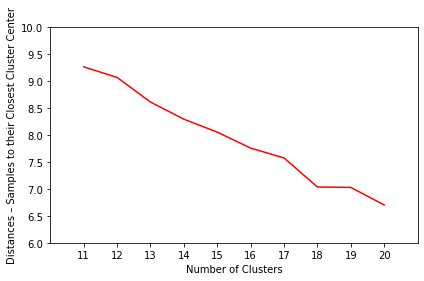

In [195]:
# create a plot to view the elbow point

plt.plot(range(11,Ks),dist_to_centroid,'r')
plt.xticks(range(11,Ks))
plt.ylabel('Distances – Samples to their Closest Cluster Center')
plt.xlabel('Number of Clusters')
plt.axis([10, 21, 6, 10])
plt.tight_layout()
plt.show()

### From the above plot, we can see an elbow point at k=18. Let's choose cluster size of 18 and run kmeans. 

In [196]:
## run k-means to cluster the neighbourhoods into 19 groups

# set number of clusters
kclusters_18 = 18

# run k-means clustering
kmeans_18 = KMeans(n_clusters=kclusters_18).fit(toronto_grouped_clustering)

# view the first 10 cluster labels generated
kmeans_18.labels_[0:10] 

array([ 1,  8, 11, 12, 14, 11,  1,  5,  1,  4], dtype=int32)

### Create a dataframe to add cluster labels to the Toronto crime data

In [202]:
# create a copy of our crime data
tor_crime_18cluster_df = tor_crime_df.copy()

In [203]:
# add cluster labels to the last column of the data and view the first 10 entries
tor_crime_18cluster_df.insert(11, 'Cluster Labels', kmeans_18.labels_)
tor_crime_18cluster_df.head(10)

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018,Crime_Occurrence,Latitude,Longitude,Crime_Rank,Cluster Labels
94,Black Creek,1005,79,221,224,46,4,1579,43.734634,-79.505355,1,1
24,Cliffcrest,787,58,314,93,50,1,1303,43.721939,-79.236232,2,8
27,Ionview,284,495,154,69,50,0,1052,43.735990,-79.276515,3,11
106,Palmerston-Little Italy,547,40,145,159,37,0,928,43.655854,-79.410116,4,12
6,The Beaches,457,22,236,78,30,0,823,43.671024,-79.296712,5,14
85,Bathurst Manor,404,109,83,64,14,0,674,43.763893,-79.456367,6,11
21,Centennial Scarborough,385,60,98,72,13,0,628,43.787491,-79.150768,7,1
103,Rexdale-Kipling,295,34,189,54,53,0,625,43.721362,-79.565513,8,5
14,Scarborough Village,340,77,96,85,22,0,620,43.743742,-79.211632,9,1
43,Kennedy Park,411,26,103,51,5,2,598,43.724878,-79.253969,10,4


In [204]:
# view the cluster labels of the last 10 entries, the neighbourhoods with the lowest crime occurrences
tor_crime_18cluster_df.tail(10)

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018,Crime_Occurrence,Latitude,Longitude,Crime_Rank,Cluster Labels
84,Banbury-Don Mills,47,10,18,3,3,0,81,43.734804,-79.357243,96,1
29,Broadview North,26,19,24,1,6,0,76,43.683924,-79.356964,97,1
111,Woburn,27,15,11,13,2,0,68,43.759824,-79.225291,98,11
128,Yonge-Eglinton,17,20,22,2,5,0,66,43.706748,-79.398327,99,1
93,Bay Street Corridor,16,16,22,2,2,1,59,43.664286,-79.387114,100,1
19,Humber Summit,35,9,6,7,1,1,59,43.760078,-79.571760,101,1
108,Pelmo Park-Humberlea,32,8,7,4,2,1,54,43.712195,-79.517511,102,11
105,New Toronto,34,5,7,4,1,2,53,43.600763,-79.505264,103,11
12,Danforth,19,16,6,1,2,2,46,43.686360,-79.300316,104,1
77,Eglinton East,20,5,13,1,3,1,43,43.739622,-79.232290,105,1


In [205]:
# view the number of neighbourhoods in each cluster
tor_crime_18cluster_df[['Neighbourhood', 'Cluster Labels']].groupby('Cluster Labels').count()

,Neighbourhood
Cluster Labels,
0,1
1,25
2,1
3,1
4,1
5,1
6,1
7,7
8,6


### Analysis ###

The neighbourhoods are not evenly distributed within the cluster groupings. 63.8% of the neighbourhoods (67/105) fall into two clusters: cluster 1 and cluster 11. Half of the clusterings, 9/18, consist of only one neighbourhood. This may reflect the lack of venue data in some cases. 31 of our neighbourhoods consist of 5 or fewer venues, which likely makes it difficult to cluster them. In turn, this may hamper our ability to find correlations between crime occurrences and venue types. However, let's look for patterns among the neighbourhoods with the highest and the lowest crime occurrences. 

Of the 10 neighbourhoods with the highest crime occurrences, 3 of them fall into cluster group 1, and 2 of them fall into cluster group 11. However, the 10 neighbourhoods with the fewest crime occurrences all fall into the same 2 groups: 7 of them are in cluster 1 and 3 in cluster 11. In fact, the two neighbourhoods with the highest and lowest crime numbers fall both fall into the same cluster group (cluster=1). This rules out the notion that venues in neighbourhood clusters 1 and 11 are correlated to crime. 

Next, let's examine the other clusters within the top 10 crime neighbourhoods. We can see five other clusters, each represented once: clusters 8, 12, 14, 5 and 4. Clusters 4 and 5 consist of only one neighbourhood each, which is not enough to predict a pattern, and so we will rule them out.  

Let's look more closely at the crime rankings of neighbourhoods in cluster groups 8, 12 and 14:


In [214]:
# view the crime rankings of neighbourhoods in cluster 8
c8_df = tor_crime_18cluster_df['Cluster Labels'] == 8
tor_crime_18cluster_df[c8_df]

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018,Crime_Occurrence,Latitude,Longitude,Crime_Rank,Cluster Labels
24,Cliffcrest,787,58,314,93,50,1,1303,43.721939,-79.236232,2,8
47,Keelesdale-Eglinton West,151,11,70,24,6,0,262,43.690158,-79.474998,39,8
50,Casa Loma,127,18,77,21,6,1,250,43.678101,-79.409416,41,8
133,Newtonbrook East,122,16,61,28,6,1,234,43.793886,-79.425679,44,8
13,Rustic,109,13,34,20,4,0,180,43.717797,-79.480273,56,8
16,South Riverdale,17,22,35,8,4,2,88,43.665470,-79.352594,91,8


From the dataframe above, only two neighbourhoods are among the highest 40 in crime numbers, ranking 2nd and 39th. However, one of the neighbourhoods has low crime numbers – it ranks 91 out 105. This makes it difficult to conclude that the neighbourhoods in cluster 8 have any correlation to crime occurrences. 

In [215]:
# view the crime rankings of neighbourhoods in cluster 12
c12_df = tor_crime_18cluster_df['Cluster Labels'] == 12
tor_crime_18cluster_df[c12_df]

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018,Crime_Occurrence,Latitude,Longitude,Crime_Rank,Cluster Labels
106,Palmerston-Little Italy,547,40,145,159,37,0,928,43.655854,-79.410116,4,12
124,Maple Leaf,148,19,46,50,8,0,271,43.712277,-79.490198,36,12
49,Old East York,91,5,20,7,1,2,126,43.691339,-79.327821,77,12


The dataframe above shows three neighbourhoods that rank 4, 36 and 77 in crime occurrences. This suggests that the neighbourhoods in this cluster group 12 are not particularly associated with crime.

In [216]:
# view the crime rankings of neighbourhoods in cluster 14
c14_df = tor_crime_18cluster_df['Cluster Labels'] == 14
tor_crime_18cluster_df[c14_df]

,Neighbourhood,Assault_2018,Auto_Theft_2018,BreakandEnter_2018,Robbery_2018,Theft_Over_2018,Homicide_2018,Crime_Occurrence,Latitude,Longitude,Crime_Rank,Cluster Labels
6,The Beaches,457,22,236,78,30,0,823,43.671024,-79.296712,5,14
101,Mount Pleasant West,153,27,86,37,9,0,312,43.703929,-79.388200,32,14
88,Bendale,149,48,38,31,7,0,273,43.753520,-79.255336,33,14
123,Dufferin Grove,36,18,39,8,8,0,109,43.653632,-79.426439,82,14


Cluster group 5 (above) has three neighbourhoods that rank in the top third of crime occurrences, however, it also has a neighbourhood that ranks 82/105 in crime. Thus, it is difficult to say decisively the neighbourhoods in this cluster have venues that are inducive to crime. 

### Conclusion

From this exploration, I cannot conclude that there is any correlation between neighbourhood venues and crime occurrences. 

Caveat: I relied on geocoder to find the neighbourhood locations. A more nuanced exploration with detailed neighbourhood coordinates may yield greater clarity. 